## Dia 2 
Lab astrophysics gravitational waves. 

In [ ]:
#Import libraries 
import numpy as np 
import matplotlib.pyplot as plt 

##Equations 

Time domain 

$h_{t}(t)=\frac{1}{dl}(\frac{G M_{c}}{c^{2}})^{5/4}(\frac{5}{c τ}^{1/4}\frac{1+\cos^{2}i}{2})\cos[Φ(τ)]$

$h_{x}(t)=\frac{1}{dl}(\frac{G M_{c}}{c^{2}})^{5/4}(\frac{5}{c τ}^{1/4}\cos i  \sin[Φ(τ)]$

Frequancy domain 

$h_{t}(f)=(\frac{5}{24\pi^{4/3}})^{1/2}e^{iψ_{t}(f)}\frac{c}{dl}(\frac{G M_{c}}{c^{3}})^{5/6}\frac{1}{f^{7/6}}\frac{i+\cos^{2}i}{2}$

$h_{t}(f)=(\frac{5}{24\pi^{4/3}})^{1/2}e^{iψ_{x}(f)}\frac{c}{dl}(\frac{G M_{c}}{c^{3}})^{5/6}\frac{1}{f^{7/6}} \cos i$

where 

$ψ_{t}=2πf0.65+\frac{dl}{c}-\frac{π}{4}+\frac{3}{4}\frac{G M_{c}}{c^{3}}(8πf^{5/3}) $

and 

$ψ_{x}=ψ_{t}+\frac{π}{2}$


In [ ]:
def get_timedomain(m1,m2,dl,G,Mc,tau,phi_tau,i):
    h_t=(1/dl)*((G*Mc)/(c**2))**(5/4)*(5/(c*tau))**(1/4)*((1+(np.cos(i)**2))/2)*np.cos(phi_tau)
    h_x=(1/dl)*((G*Mc)/(c**2))**(5/4)*(5/(c*tau))**(1/4)*(np.cos(i))*(np.sin(phi_tau))
    return(h_t,h_x)

def get_freqdomain(f,G,Mc,c,i,dl):
  phit = (2)*(np.pi)*(f)*((0.65)+(dl/c))-((np.pi)/4)+(3/4)*(((((G)*(Mc))/(c**3))*(8)*(np.pi)*(f))**(-5/3))
  phix = phit+(np.pi/2)
  h_t1=((5/(24*np.pi**(4/3)))**(1/2))*(np.cos(phit))*(c/dl)*((G*Mc)/(c**3))**(5/6)*(1/(f**(7/6)))*((1+(np.cos(i)**2))/2)
  h_x1=((5/(24*np.pi**(4/3)))**(1/2))*(np.cos(phix))*(c/dl)*((G*Mc)/(c**3))**(5/6)*(1/(f**(7/6)))*np.cos(i)
  return(h_t1,h_x1)
#defining variables 

m1 = 20 #msol
m2 = 20 #msol
dl = 100*3.086e22#Mpc to km
Mpc = 3.086e22
G = 6.674e-11 #m^3/Kg*s2
i=np.pi/4
m11=m1*1.989e30
m22=m2*1.989e30

Mc = ((m11*m22)**(3/5))*((m11+m22)**(-1/5))

tau = np.linspace(0.005,0.65,5000)
tau1 = tau**(5/8)

c=3e8 #Speed of light in SI


phi_t=-2*(5*G*Mc/c**3)**(-5/8)*(tau1)
h_t,h_x = get_timedomain(m11,m22,dl,G,Mc,tau,phi_t,i)
fisco = ((1/(12*np.pi*np.sqrt(6)))*((c**3)/(G*(m11+m22))))
f = np.linspace(1,fisco,5000)
h_t1,h_x1 = get_freqdomain(f,G,Mc,c,i,dl)

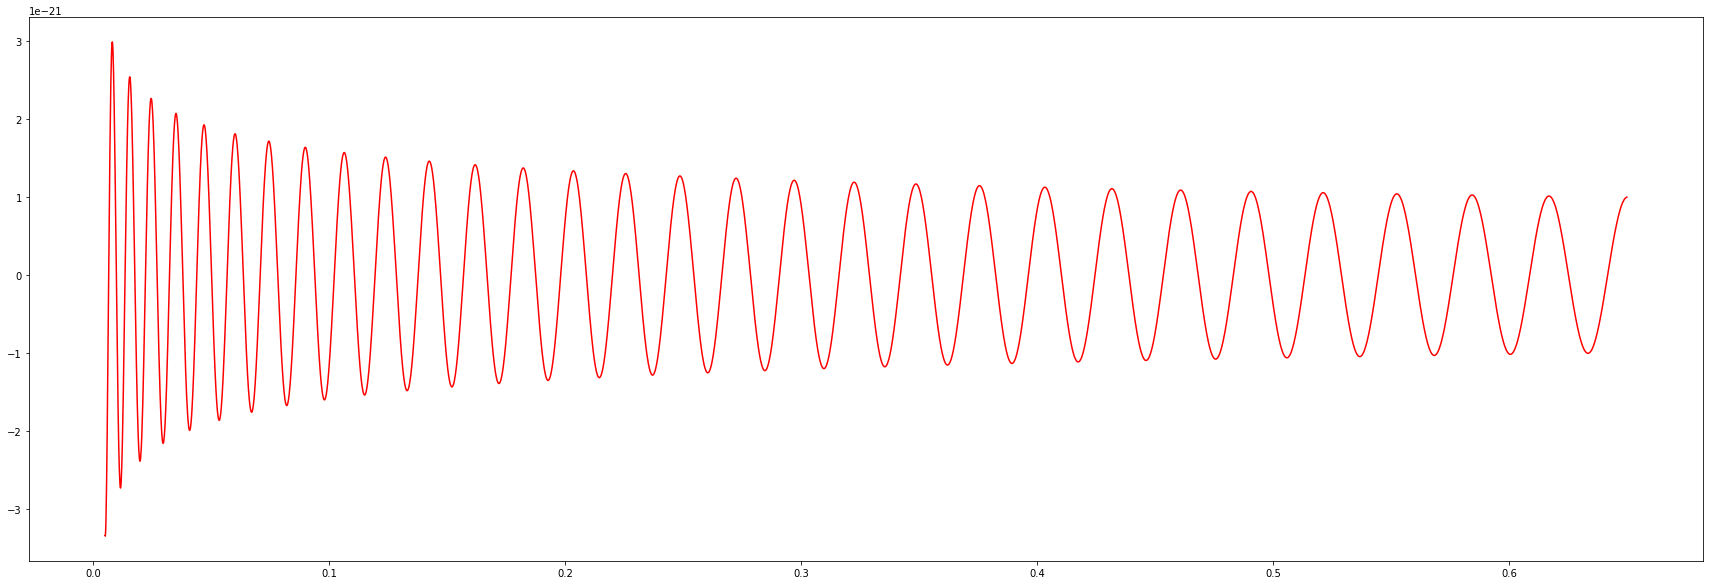

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(tau,h_t,c='r')

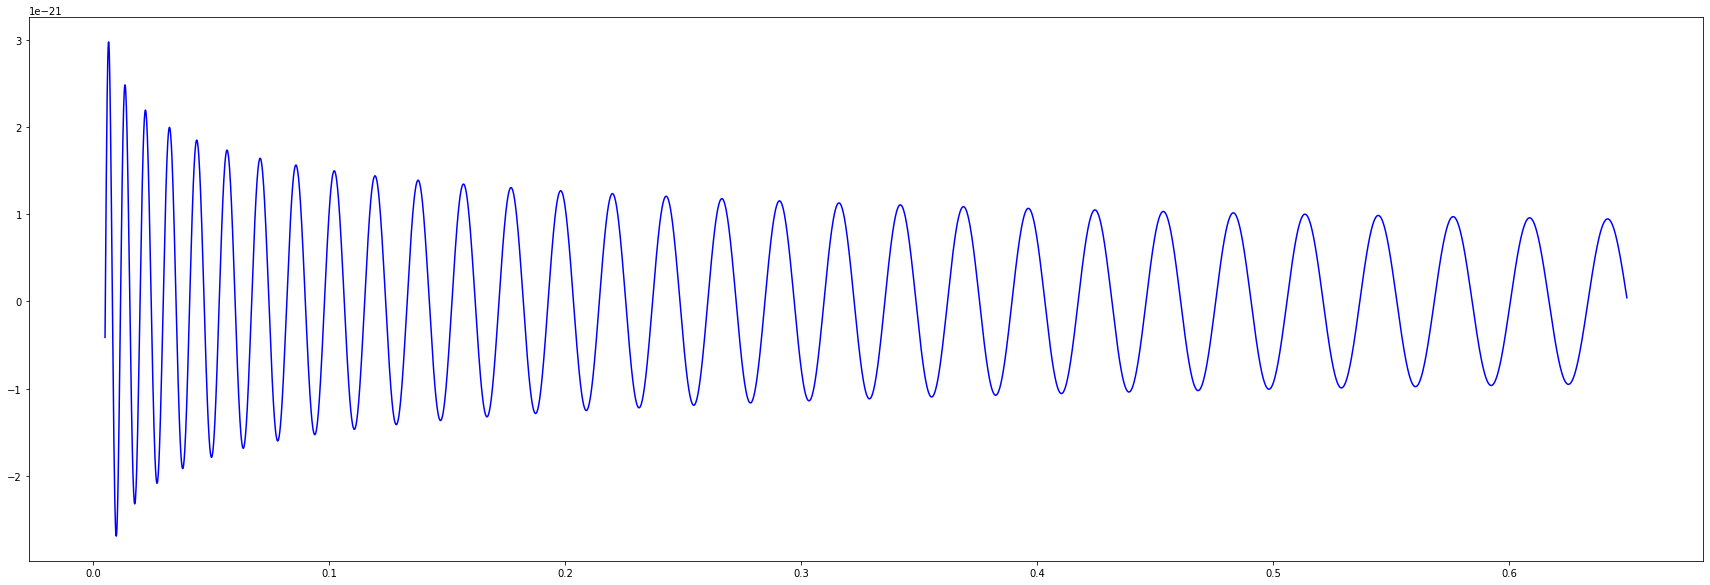

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(tau,h_x,c='b')

(0.0, 20.0)

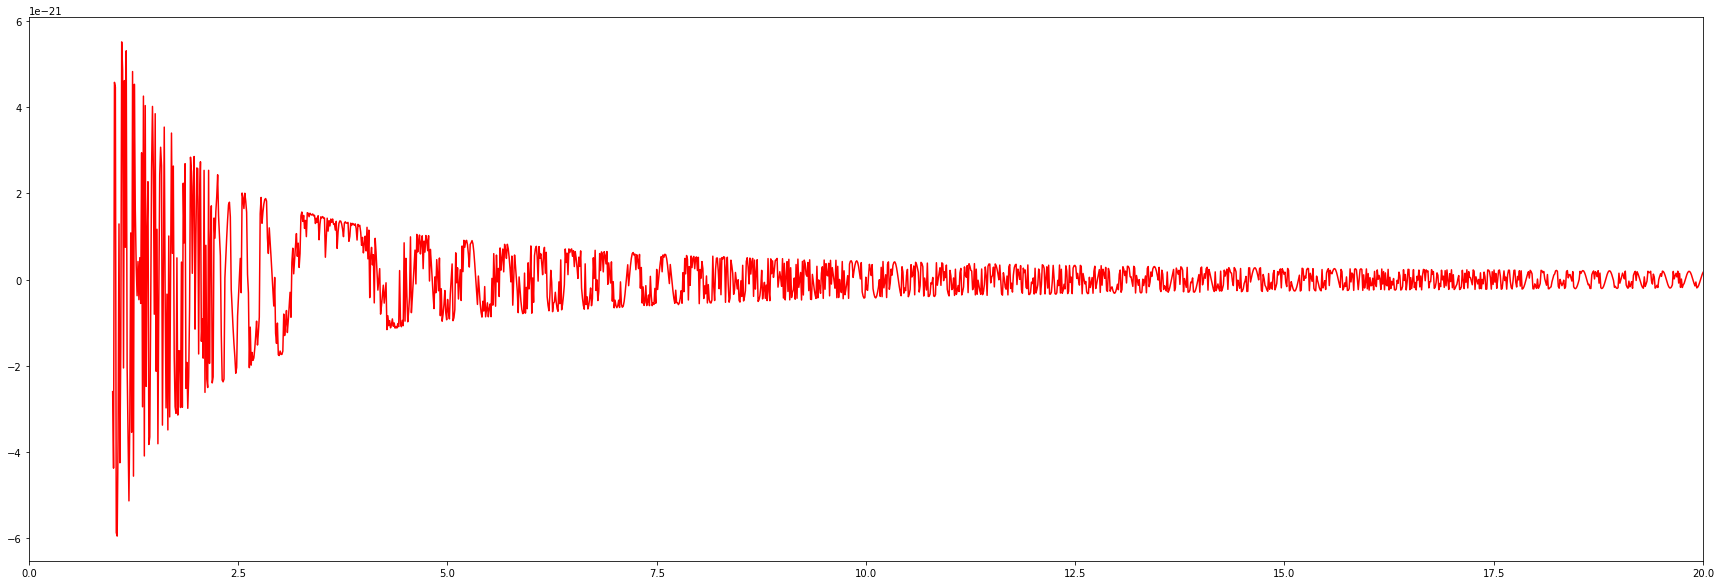

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(f,h_t1,c='r')
plt.xlim(0,20)

(0.0, 20.0)

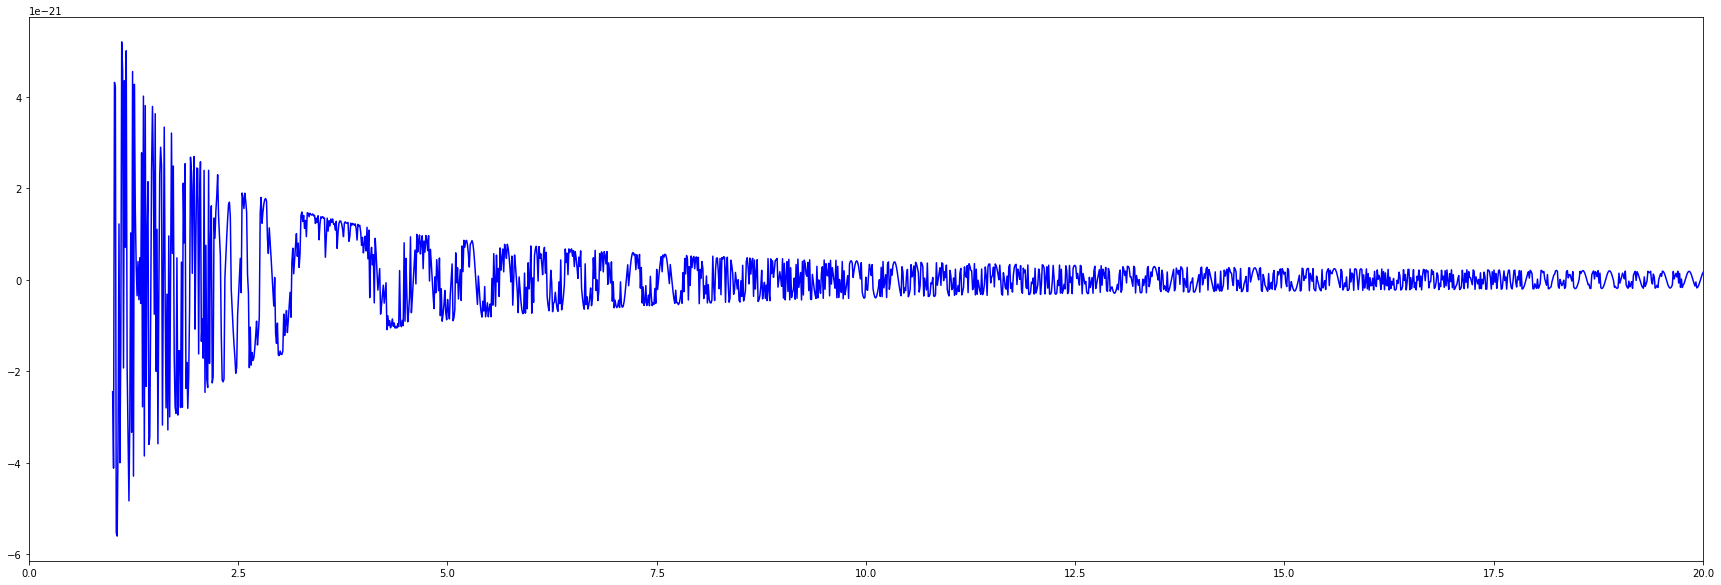

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(f,h_x1,c='b')
plt.xlim(0,20)

##Day 3 gaussian noise 
$p_{G}(z)=\frac{1}{σ\sqrt{2π}}e^{-\frac{(z-μ)^{2}}{2σ^{2}}}$

In [ ]:
#Modeled by equation above 
#Model noise 
mu = 0 
var = 10e-22
noise_t = np.random.normal(mu,var,5000)


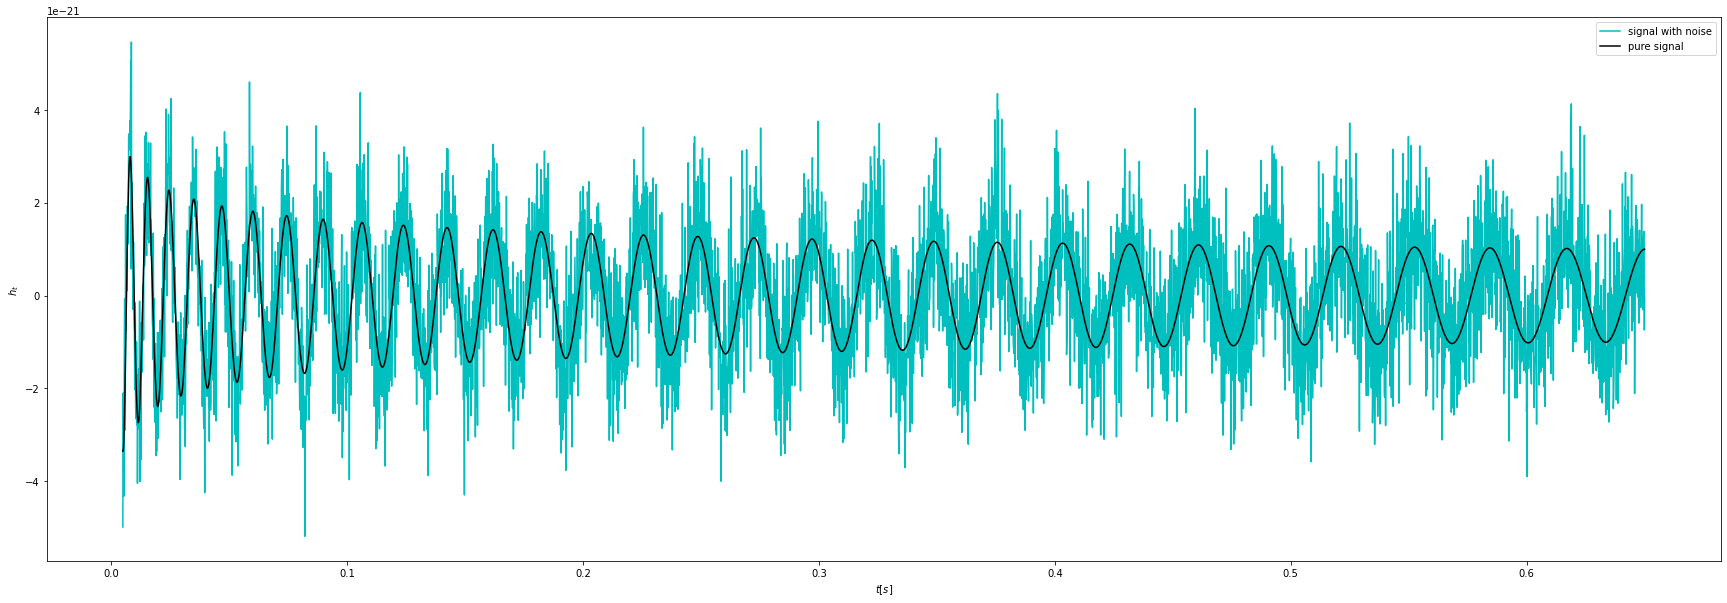

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(tau,h_t+noise_t,c='c',label = 'signal with noise')
plt.plot(tau,h_t,c='k', label = 'pure signal')
plt.xlabel('$ t [s]$')
plt.ylabel('$h_{t}$')
plt.legend()
plt.show()

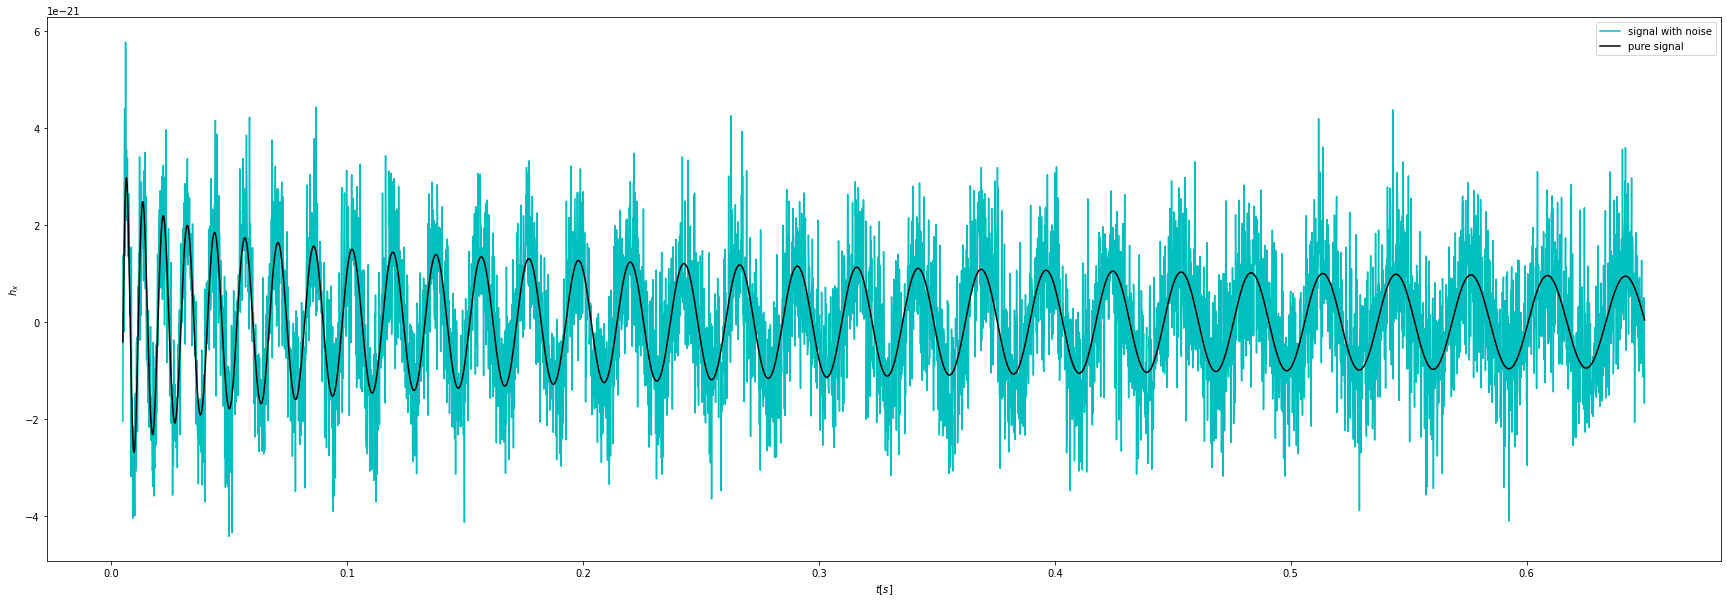

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(tau,h_x+noise_t,c='c',label = 'signal with noise')
plt.plot(tau,h_x,c='k', label = 'pure signal')
plt.xlabel('$t [s]$')
plt.ylabel('$h_{x}$')
plt.legend()
plt.show()

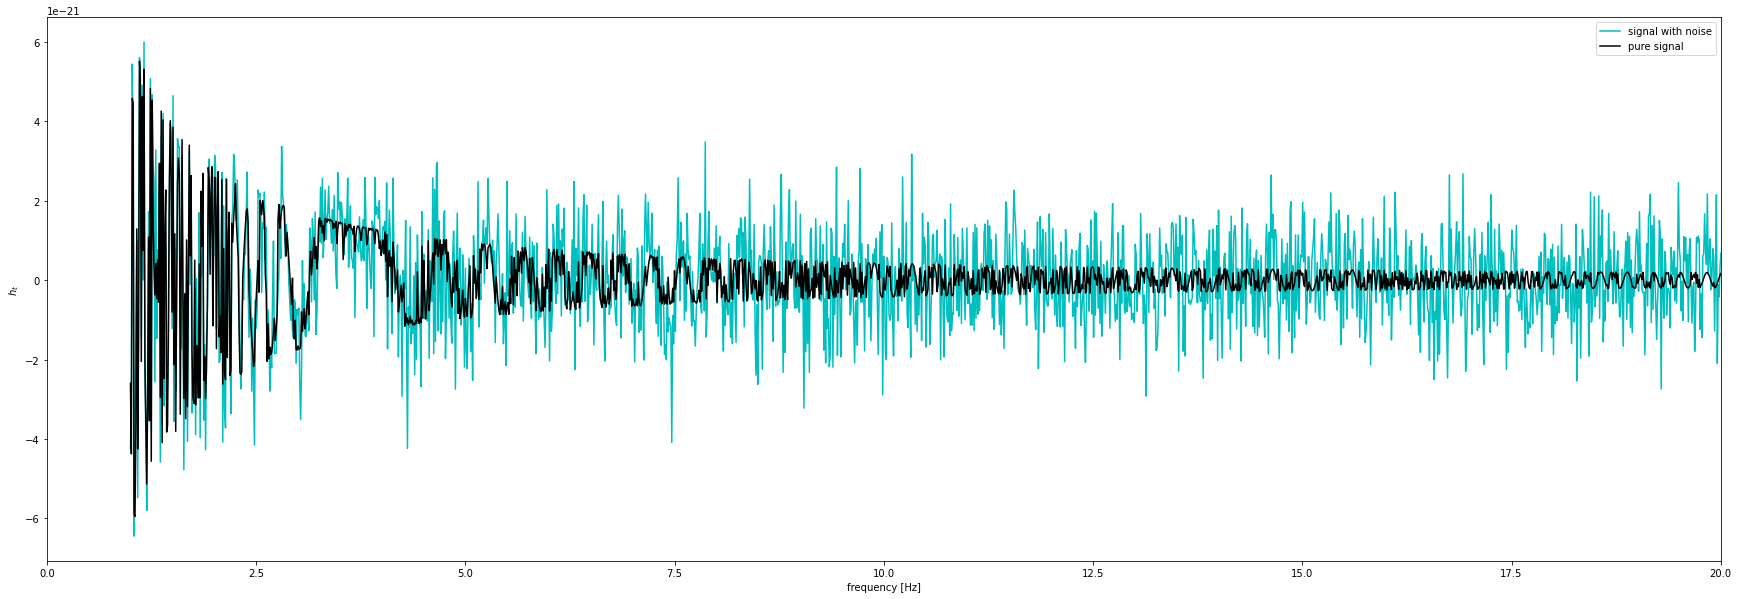

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(f,h_t1+noise_t,c='c', label = 'signal with noise')
plt.plot(f,h_t1,c='k',label = 'pure signal')
plt.xlim(0,20)
plt.xlabel('frequency [Hz]')
plt.ylabel('$h_{t}$')
plt.legend()
plt.show()

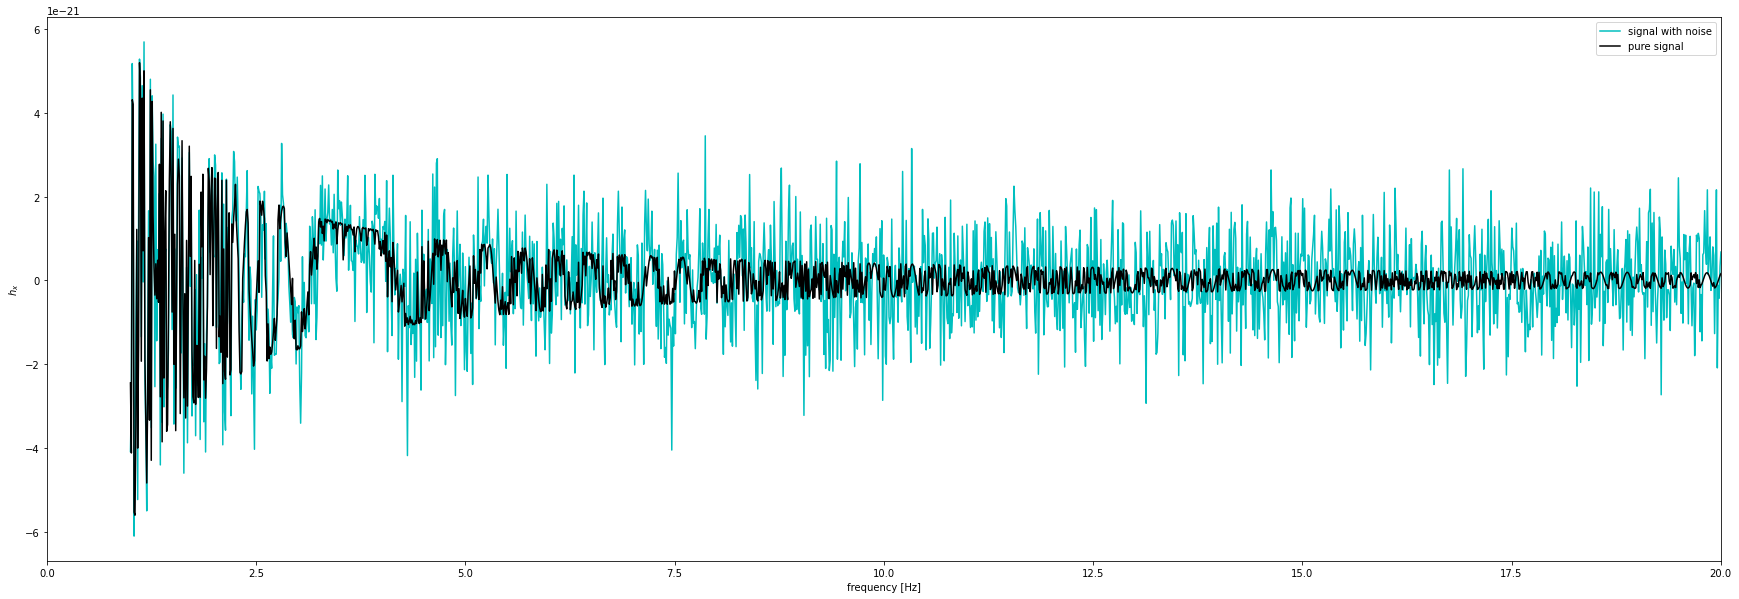

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(f,h_x1+noise_t,c='c', label = 'signal with noise')
plt.plot(f,h_x1,c='k',label = 'pure signal')
plt.xlim(0,20)
plt.xlabel('frequency [Hz]')
plt.ylabel('$h_{x}$')
plt.legend()
plt.show()

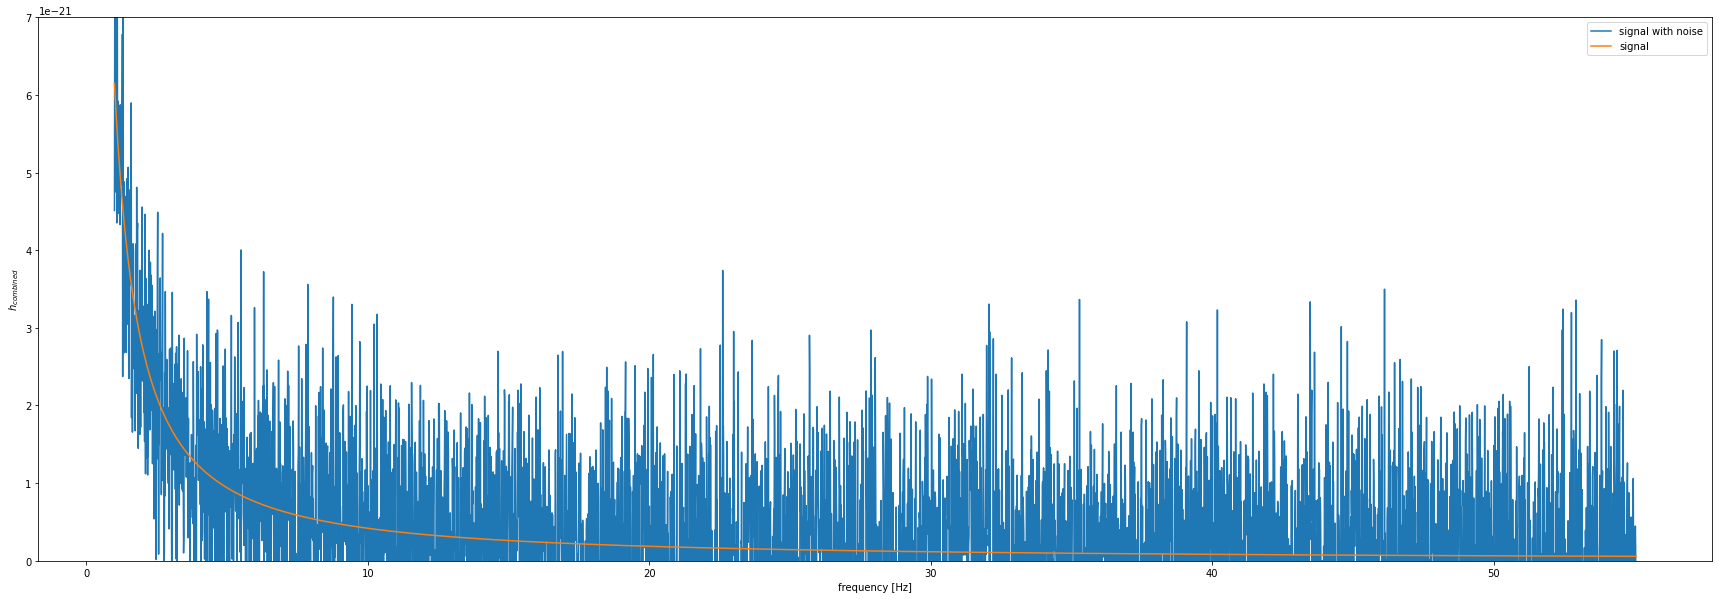

In [ ]:
def get_new_h_t_h_x(h_t1,h_x1):
  phit = (2)*(np.pi)*(f)*((0.65)+(dl/c))-((np.pi)/4)+(3/4)*(((((G)*(Mc))/(c**3))*(8)*(np.pi)*(f))**(-5/3))
  phix = phit+(np.pi/2)
  h_t11 = h_t1/(np.cos(phit))
  h_x11 = h_x1/(np.cos(phix))
  return(h_t11,h_x11)
def get_amplituddes(h_t11,h_x11):
  amplitude = ((1/2)*(((h_t11)**2)+(h_x11)**2))**(1/2)
  return(amplitude)
h_t11,h_x11 = get_new_h_t_h_x(h_t1,h_x1)
amplitude = get_amplituddes(h_t11,h_x11)
plt.figure(figsize=(30,10))
plt.plot(f,amplitude+noise_t,label = 'signal with noise')
plt.plot(f,amplitude,label = 'signal')
plt.xlabel('frequency [Hz]')
plt.ylabel('$h_{combined}$')
plt.ylim(0,7e-21)
plt.legend()
plt.show()


#Day 4 
##Parameter estimation
Estimation of the source parameters using Bayes Theorem. 

$P(\vec{θ}|d)=\frac{P(d|\vec{θ})P(\vec{θ})}{P(d)}$ 

#Markov Chains Montecarlo
##Montecarlo´s Method 
Montecarlo begin as an idea of how to win solitarie cards game, after being kicked from los alamos. 
Start by using the idea of random numbers. 
##Markov Chain Monte Carlo 
$θ_{t}\sim N(θ_{t-1},\sigma))$

Method consist on drawing the data obtained \\
Draw a random number r from a uniform distribution \\
then compare values and discard some of them. 





In [ ]:
pip install emcee

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 3.5 MB/s 


In [ ]:
pip install corner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import corner
import emcee 
import scipy as sp

In [ ]:
#Define D_l[1,200] and i[1,pi]


minimum = 1 
maximum = 200
maximun = np.pi

#Define prior, likelihood, probability 
def log_prior(theta):
  par1,par2 = theta
  if 1 < par1 < maximum and 0 < par2 < maximun:
    return 0.0
  return -np.inf


# define model as the combinantion of h_plus and h_cross 
def model(theta):
  DL, iota = theta
  h_t111=((5/(24*np.pi**(4/3)))**(1/2))*(c/(DL*Mpc))*(((G*Mc)/(c**3))**(5/6))*(1/(f**(7/6)))*((1+((np.cos(iota))**2))/2)
  h_x111=((5/(24*np.pi**(4/3)))**(1/2))*(c/(DL*Mpc))*(((G*Mc)/(c**3))**(5/6))*(1/(f**(7/6)))*np.cos(iota)
  return ((1/2)*((h_t111)**2+(h_x111)**2))**(1/2)

#define elements of Bayes Theorem
def log_likelihood(theta):
    integrand = -2*(((np.absolute(amplitude+noise_t-model(theta)))/((var))))**2
    return sp.integrate.simpson(y=integrand,x=f)
 
def log_probability(theta):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    aaa =lp + log_likelihood(theta)
    return aaa

 

  0%|          | 0/40000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 40000/40000 [11:13<00:00, 59.42it/s]


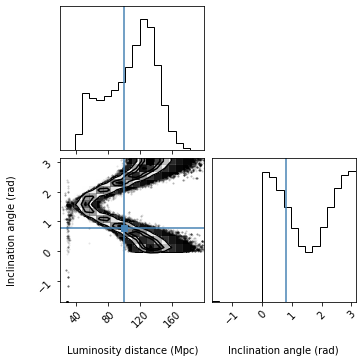

In [ ]:

#implement emcee
pos = (30, 0.5)+np.random.randn(30, 2)
nwalkers, ndim = pos.shape
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability)
print ()
sampler.run_mcmc(pos, 40000, progress=True)

samples = sampler.chain[:,:,:].reshape((-1,ndim))
filename = "output_case_1.dat"
np.savetxt(filename, samples)

data = np.loadtxt('output_case_1.dat')

fig = corner.corner(data, labels=["Luminosity distance (Mpc)", "Inclination angle (rad)"], truths=[dl/Mpc, i])
plt.show()


##Day 5 
Final day :v
Horizonte de deteccion de ondas gravitacionales

Fondo estocastico de ondas gravitacionales SGWB. 

$Ω_{gw}=\frac{1}{ρ_{c}c^{2}}\int_{zmin}^{zmax} dz\int d\theta p(\theta) \frac{N(z)}{1+z}(f_{z}\frac{d E_{gw}(\theta)}{d f_{r}})\Big|_{f_{r}=f(1+z)}$

Using a model to distinguish between primordial and astrophysical events...




